In [1]:
import matplotlib.pyplot as plt
import numpy as np
from embedders import manifolds, gaussian_mixture, predictors
from sklearn.model_selection import train_test_split

In [2]:
pm = manifolds.ProductManifold(signature=[(1,3),(1,3),(-1,3),(-1,3),(0,3)])
X, y = gaussian_mixture.gaussian_mixture(pm, num_points=1000, num_classes=5, seed=9)

/opt/miniconda3/envs/embedders/lib/python3.11/site-packages/torch/distributions/wishart.py:271: UserWarning: Singular sample detected.
  warnings.warn("Singular sample detected.")


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pdt = predictors.tree_new.ProductSpaceDT(pm=pm, n_features="d_choose_2")
pdt.fit(X_train, y_train)

print(f"{pdt.score(X_test, y_test).float().mean().item():.4f}")

0.8800


In [4]:
def plot_decision_boundary(X, y, split_dims, theta):
    # plot data
    plt.scatter(X[:,split_dims[0]].numpy(), X[:,split_dims[1]].numpy(), c=y)

    # plot decision boundary
    c = np.cos(theta)
    s = np.sin(theta)
    plt.plot([-s*1e10, s*1e10], [-c*1e10, c*1e10], 'r-')

    # put boundaries back
    plt.xlim(X[:,split_dims[0]].min(), X[:,split_dims[0]].max())
    plt.ylim(X[:,split_dims[1]].min(), X[:,split_dims[1]].max())

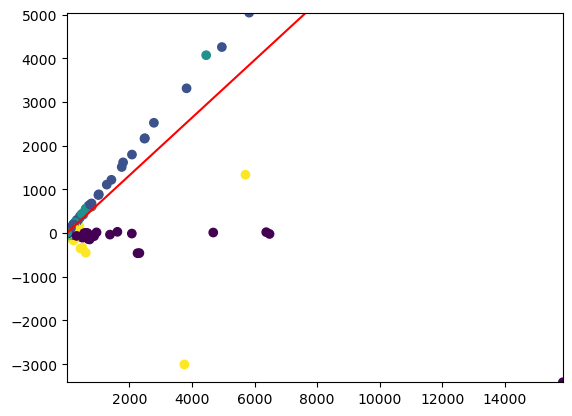

In [5]:
node0_split = pdt.angle_dims[pdt.nodes[0].feature]
theta0 = pdt.nodes[0].theta
plot_decision_boundary(X, y, node0_split, theta0)

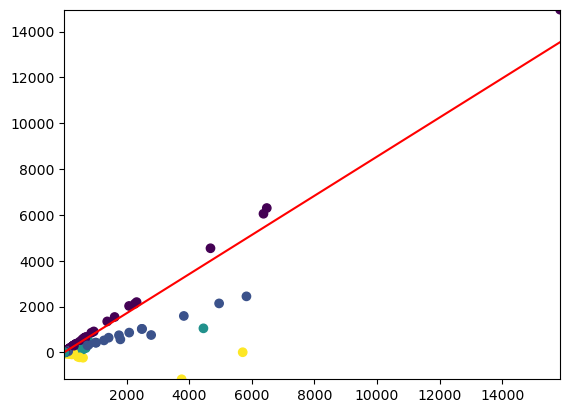

In [6]:
node1_split = pdt.angle_dims[pdt.nodes[1].feature]
theta1 = pdt.nodes[1].theta
plot_decision_boundary(X, y, node1_split, theta1)

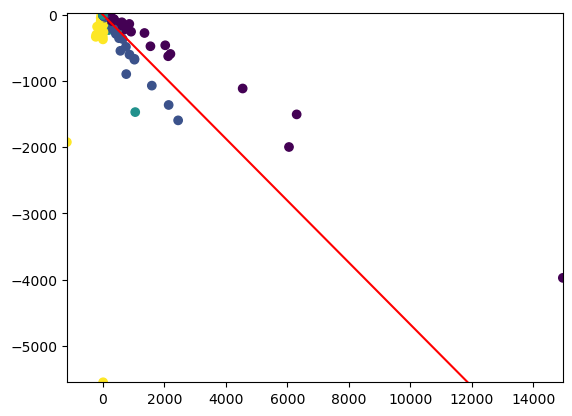

In [7]:
node2_split = pdt.angle_dims[pdt.nodes[2].feature]
theta2 = pdt.nodes[2].theta
plot_decision_boundary(X, y, node2_split, theta2)

In [8]:
node3_split = pdt.angle_dims[pdt.nodes[3].feature]
print(node3_split)

(None, 18)


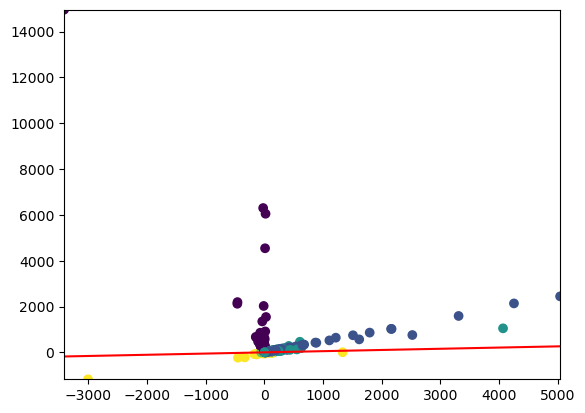

In [9]:
node4_split = pdt.angle_dims[pdt.nodes[4].feature]
theta4 = pdt.nodes[4].theta
plot_decision_boundary(X, y, node4_split, theta4)

In [10]:
print(pdt.nodes[5].feature)

None


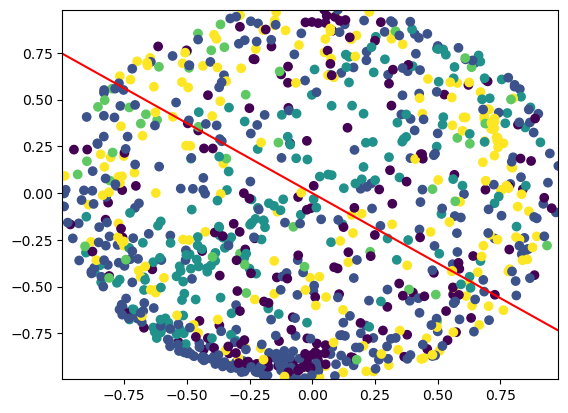

In [11]:
node6_split = pdt.angle_dims[pdt.nodes[6].feature]
theta6 = pdt.nodes[6].theta
plot_decision_boundary(X, y, node6_split, theta6)

In [12]:
print(pdt.nodes[7].feature)

None


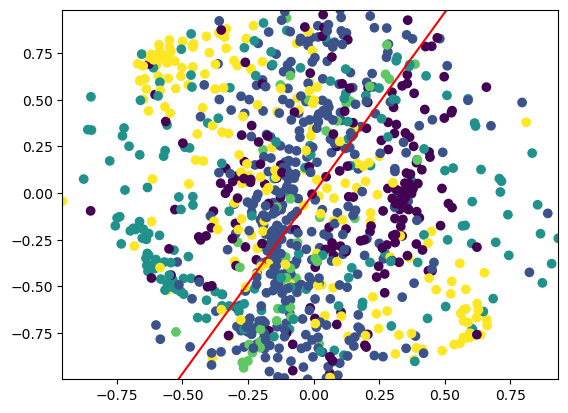

In [13]:
node8_split = pdt.angle_dims[pdt.nodes[8].feature]
theta8 = pdt.nodes[8].theta
plot_decision_boundary(X, y, node8_split, theta8)